In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle

In [0]:
pickle_off1 = open("drive/My Drive/Nagarro/Assignment 3/testX.pickle","rb")
testX= pickle.load(pickle_off1)

pickle_off2 = open("drive/My Drive/Nagarro/Assignment 3/trainX.pickle","rb")
trainX= pickle.load(pickle_off2)

pickle_off3 = open("drive/My Drive/Nagarro/Assignment 3/trainY.pickle","rb")
trainY= pickle.load(pickle_off3)

In [0]:
import pandas as pd

In [6]:
trainX.shape

(60000, 28, 28)

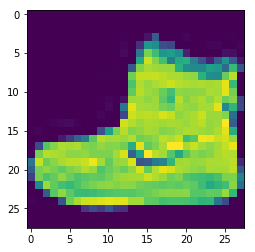

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.imsave('filename.png', np.array(trainX[0]).reshape(28,28), cmap=cm.gray)
plt.imshow(np.array(trainX[0]).reshape(28,28))

In [0]:
# As we can see, the data is image type and therefore we need to use CNN.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.2, random_state=42)


In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
testX = testX.reshape(testX.shape[0], *(28, 28, 1))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 1))

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation, MaxPooling2D, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [35]:
cnn = Sequential() # model has layers in sequence

# convolutional layer
cnn.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu')) # convoluting
cnn.add(MaxPooling2D(pool_size=(3,3))) # pooling
cnn.add(Dropout(0.15)) # to prevent overfitting

cnn.add(Conv2D(64, (2, 2), activation='relu')) # convoluting
cnn.add(MaxPooling2D(pool_size=(2,2))) # pooling

cnn.add(Flatten()) # flattening into 1D set.
cnn.add(Dropout(0.15))

cnn.add(Dense(units=10, activation='softmax')) # Output layer
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 64)          65600     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 576)               0         
__________

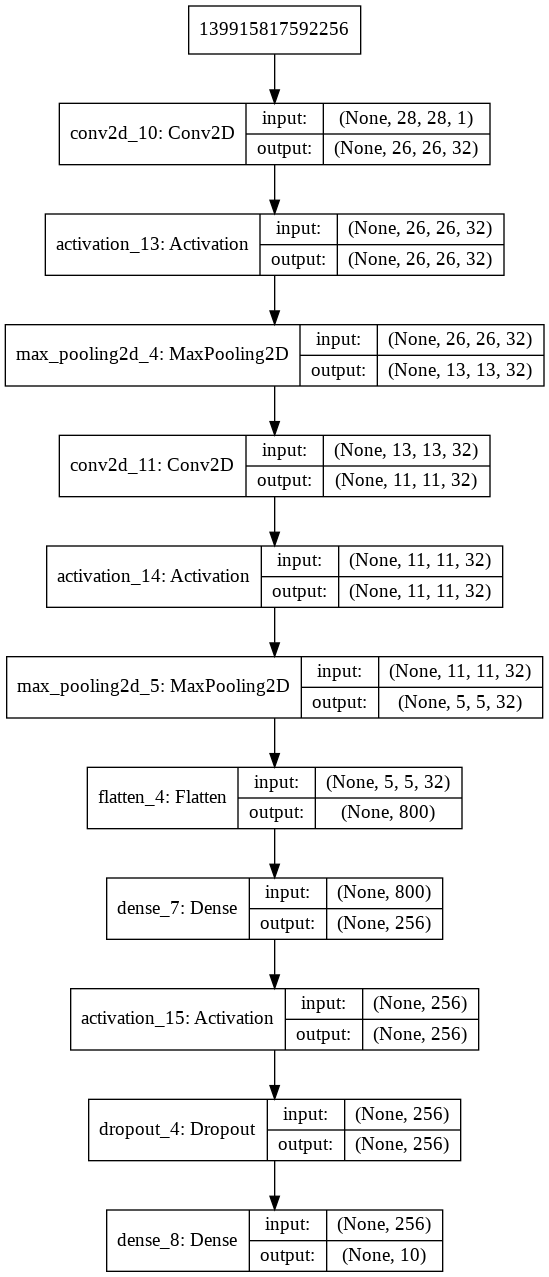

In [36]:
from keras.utils import plot_model
plot_model(cnn, show_shapes=True, show_layer_names=True, to_file='drive/My Drive/Nagarro/Assignment 3/model.png')
from IPython.display import Image
Image(retina=True, filename='drive/My Drive/Nagarro/Assignment 3/model.png')

In [39]:
cnn.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(X_train, y_train, batch_size=512, epochs=50,verbose=1, validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 116us/step - loss: 3.1634 - acc: 0.5754 - val_loss: 0.6576 - val_acc: 0.7743
Epoch 2/50
48000/48000 [==============================] - 4s 78us/step - loss: 0.6671 - acc: 0.7621 - val_loss: 0.5260 - val_acc: 0.8161
Epoch 3/50
48000/48000 [==============================] - 4s 78us/step - loss: 0.5588 - acc: 0.7974 - val_loss: 0.4670 - val_acc: 0.8314
Epoch 4/50
48000/48000 [==============================] - 4s 78us/step - loss: 0.4986 - acc: 0.8207 - val_loss: 0.4405 - val_acc: 0.8374
Epoch 5/50
48000/48000 [==============================] - 4s 79us/step - loss: 0.4626 - acc: 0.8321 - val_loss: 0.4123 - val_acc: 0.8532
Epoch 6/50
48000/48000 [==============================] - 4s 78us/step - loss: 0.4409 - acc: 0.8408 - val_loss: 0.4015 - val_acc: 0.8548
Epoch 7/50
48000/48000 [==============================] - 4s 78us/step - loss: 0.4239 - acc: 0.8454 - val_loss: 0.3839 - val_ac

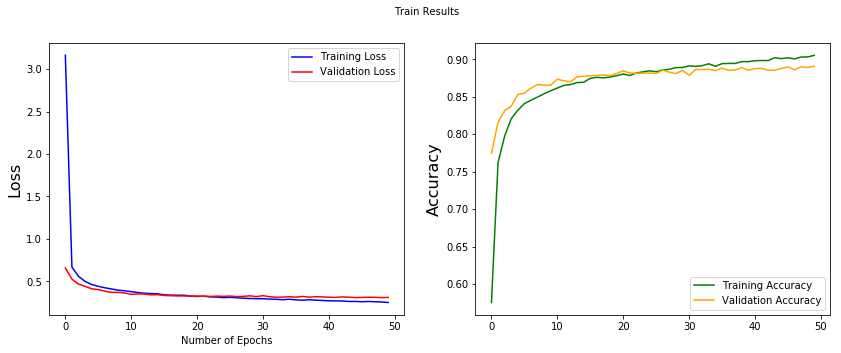

In [40]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], color='green', label='Training Accuracy')
plt.plot(history.history['val_acc'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [0]:

y_pred = model.predict_classes(testX)

In [0]:
pd.DataFrame(y_pred).to_pickle("drive/My Drive/Nagarro/Assignment 3/lastAssignment.pickle")
#y_predto_pickle(y_pred,)

In [0]:
model.save("drive/My Drive/Nagarro/Assignment 3/myModel.h5")